In [1]:
from tensorflow.keras.models import Sequential #載入models物件的Sequential(神經序列)方法
from tensorflow.keras.models import load_model #載入models物件的讀取圖模型方法
from tensorflow.keras import layers #載入layers(神經層)物件
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical #載入二進制矩陣轉換方法
import matplotlib.pyplot as plt #載入圖表套件
from PIL import Image #載入圖片物件
import glob #載入讀檔套件
import numpy as np #載入數學擴充套件
#魔術方法 讓該套件可以在 IPython直接執行，無須使用 plt.show()來輸出圖表
%matplotlib inline

In [2]:
model5h = load_model('my_model.h5') #載入模型
model5h.summary() #顯示當前模型設定值

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
#建立Sequential(神經序列)物件並載入訓練好的模型
model = Sequential([model5h, layers.Softmax()])

In [4]:
#多張圖片的載入方式
''''''
images = glob.glob("test_images/*.jpg") #載入路徑底下的所有JPG檔
imgs = [] #建立空物件
#讀取圖片
for image in images: 
    with open(image, 'rb') as file:
        #讀取圖片並轉成28x28的大小
        p = Image.open(file).convert('L').resize((28, 28), Image.Resampling.LANCZOS)
        p = 255 - np.array(p) #負片
        #重塑矩陣並轉型成float32，再轉換成0~1的浮點數
        imgs.append(p.reshape(784).astype('float32')/255)


img = np.stack(imgs, axis=0) #堆疊所有圖形矩陣

In [5]:
#單張圖片的載入方式
'''
#讀取圖片並轉成28x28的大小
image = Image.open("test_images/test_0.jpg").convert('L').resize((28, 28), Image.Resampling.LANCZOS)
img = 255 - np.array(image) #負片
#重塑矩陣並轉型成float32，再轉換成0~1的浮點數
img = img.reshape(1,784).astype('float32')/255 
'''

'\n#讀取圖片並轉成28x28的大小\nimage = Image.open("test_images/test_0.jpg").convert(\'L\').resize((28, 28), Image.Resampling.LANCZOS)\nimg = 255 - np.array(image) #負片\n#重塑矩陣並轉型成float32，再轉換成0~1的浮點數\nimg = img.reshape(1,784).astype(\'float32\')/255 \n'

In [6]:
print(img.shape) #輸出矩陣規格
predictions = model.predict(img) #執行預測

(10, 784)


In [7]:
predictions[0] #輸出預測結果

array([0.23196909, 0.08533676, 0.08533685, 0.08533676, 0.08533676,
       0.08533676, 0.08533676, 0.08533676, 0.08533676, 0.08533676],
      dtype=float32)

6


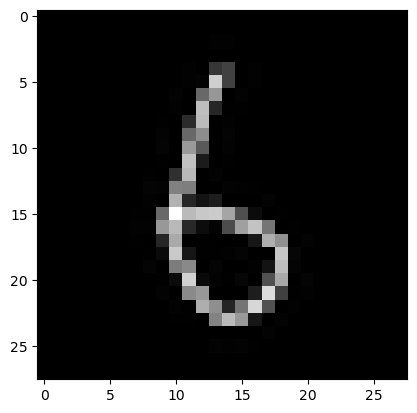

In [8]:
print(np.argmax(predictions[6])) #輸出預測結果(答案)
plt.gray() #設定黑白輸出
plt.imshow(img[6].reshape(28, 28)) #輸出指定圖片